# Закономерности, определяющие успешность игры

**Описание проекта**

Для планирования рекламных компаний и определения потенциально популярного продукта интернет-магазина компьютерных игр необходимо выявить факторы успешности игры. На данных до 2016 года из открытых источников требуется спланировать компанию на 2017 год. В данных имеется информация о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Данные включают в себя несколько регионов: Северная Америка (NA), Европа (EU), Япония (JP) и другие (others).

**Ход исследования**
1. Изучение данных
2. Предобработка
3. Исследовательский анализ данных
4. Составление портрета пользователя каждого региона
5. Формулирование гипотез

## 1. Открытие и изучение файлов

In [1]:
# загружаем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
# читаем данные
data = pd.read_csv('/datasets/games.csv')
display(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# выведем название столбцов
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
# выведем уникальные значения по каждом столбцу
# если их слишком много, ты выведем их количество
print('Количество игр:', len(data['Name'].unique()))
print()
print('Количество платформ:', len(data['Platform'].unique()))
print()
print('Уникальные платформы:', data['Platform'].unique())
print()
print('Уникальные года выпуска:', sorted(data['Year_of_Release'].unique()))
print()
print('Уникальные жанры:', data['Genre'].unique())
print()
print('Уникальные значения столбцов NA_sales, EU_sales, JP_sales, Other_sales, Critic_Score, User_Score выводить не надо,')
print('так как там будет огромное количество значений')
print()
print('Уникальные значения рейтинга критиков',data['Critic_Score'].unique())
print()
print('Уникальные значения рейтинга пользователей',data['User_Score'].unique())
print()
print(data['Rating'].unique())

Количество игр: 11560

Количество платформ: 31

Уникальные платформы: ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

Уникальные года выпуска: [1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, nan]

Уникальные жанры: ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]

Уникальные значения столбцов NA_sales, EU_sales, JP_sales, Other_sales, Critic_Score, User_Score выводить не надо,
так как там будет огромное количество значений

Уникальные значения рейтинга критиков [76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 

**Вывод**

Имеем датафрейм из ***11 столбцов***:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

В последнем столбце Rating перечислены ***категории*** и вот их расшифровки:

- E - («Everyone») — «Для всех»
- M - («Mature») — «Для взрослых»
- T - («Teen») — «Подросткам»
- E10+ - («Everyone 10 and older») — «Для всех от 10 лет и старше»
- K-A - ("Kids to Adults") - версия E до 1996 (после 1996 года категория изменилась на Е)
- AO - («Adults Only 18+») — «Только для взрослых»
- EC - («Early childhood») — «Для детей младшего возраста»
- RP - («Rating Pending») — «Рейтинг ожидается»

Что необходимо ***подправить в данных***: 

- изменить названия столбцов на нижний регистр
- изменить тип данных в столбце Year_of_Release  и Critic_Score
- обработать пропуски
- tbd в пользовательском рейтинге означает to be determinated - подлежит уточнению, поэтому заменять tbd буду на среднее или медиану по платформе

## 2. Предобработка данных

In [6]:
# приводим названия столбцов к нижнему регистру
columns_list = []
for i in data.columns:
    columns_list.append(i)

new_columns_list = []
for i in columns_list:
    new_columns_list.append(i.lower())
print(new_columns_list)

data.columns = new_columns_list
display(data.head())

['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
# заменяем тип данных в столбце year_of_release в целый
# data['year_of_release'] = data['year_of_release'].astype('int')
# display(data.head())
display(data['year_of_release'].isna().sum())

269

In [8]:
display(data[data['year_of_release'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
# с помощью гуглежа и метода map() заменяем пропуски в годах
mapping = {'Madden NFL 2004': 2003,
 'FIFA Soccer 2004': 2003,
 'LEGO Batman: The Videogame': 2008,
 'wwe Smackdown vs. Raw 2006': 2005,
 'Space Invaders': 1980,
 'Rock Band': 2007,
 "Frogger's Adventures: Temple of the Frog": 2001,
 'LEGO Indiana Jones: The Original Adventures': 2008,
 'Call of Duty 3': 2006,
 'Call of Duty: Black Ops': 2010,
 'Triple Play 99': 1998,
 'Adventure': 1979,
 'Combat': 1977,
 'LEGO Harry Potter: Years 5-7': 2011,
 'NASCAR Thunder 2003': 2002,
 'Hitman 2: Silent Assassin': 2002,
 'Legacy of Kain: Soul Reaver': 1999,
 'Donkey Kong Land III': 1997,
 'Air-Sea Battle': 1977,
 'Suikoden III': 1995,
 'Wheel of Fortune': 1992,
 'Yakuza 4': 2010,
 'Namco Museum': 2005,
 'Rhythm Heaven': 2011,
 'The Lord of the Rings: War in the North': 2011,
 'Madden NFL 07': 2006,
 'MLB SlugFest 20-03': 2002,
 'Shaun White Snowboarding': 2008,
 'PES 2009: Pro Evolution Soccer': 2008,
 'WarioWare: Twisted!': 2004,
 'Madden NFL 11': 2011,
 'Test Drive Unlimited 2': 2011,
 'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe': 2005,
 'Monster Hunter 2': 2006,
 'Metal Gear Solid 2: Substance': 2003,
 'Advance Wars: Days of Ruin': 2008,
 'The Golden Compass': 2007,
 'Madden NFL 06': 2005,
 'NASCAR: Dirt to Daytona': 2002,
 'Madden NFL 2002': 2001,
 'Def Jam: Fight for NY': 2004,
 'NBA Street Vol. 2': 2003,
 'Fishing Derby': 1980,
 'Wet': 2009,
 'Sonic the Hedgehog': 2006,
 'Karate': 1982,
 'Tiger Woods PGA Tour 07': 2006,
 'Circus Atari': 1980,
 'The Chronicles of Riddick: Escape from Butcher Bay': 2004,
 "Maze Craze: A Game of Cops 'n Robbers": 1980,
 'Silent Hill: Homecoming': 2008,
 'Super Breakout': 1981,
 "Robert Ludlum's The Bourne Conspiracy": 2008,
 'NHL Slapshot': 2010,
 'TERA': 2011,
 'NFL GameDay 2003': 2002,
 'Harvest Moon: Save the Homeland': 2001,
 'Hangman': 1978,
 'NBA Live 2003': 2002,
 "Cubix Robots for Everyone: Clash 'n' Bash": 2002,
 'Dragon Ball Z: Budokai Tenkaichi 2 (JP sales)': 2007,
 'Tropico 4': 2011,
 'Tomb Raider (2013)': 2013,
 'Bejeweled 3': 2010,
 'Custom Robo': 1999,
 'Final Fantasy XI': 2002,
 'Singularity': 2010,
 'Dragster': 1980,
 'All-Star Baseball 2005': 2004,
 'Star Wars Jedi Knight II: Jedi Outcast': 2002,
 'Slot Machine': 1979,
 'The Dukes of Hazzard II: Daisy Dukes It Out': 2000,
 'Harvest Moon: The Tale of Two Towns': 2011,
 'Shrek the Third': 2007,
 'Nicktoons: Battle for Volcano Island': 2006,
 'Haven: Call of the King': 2002,
 'Unreal Championship 2: The Liandri Conflict': 2005,
 'Pac-Man Fever': 2002,
 'The Legend of Zelda: The Minish Cap(weekly JP sales)': 2004,
 'Indy 500': 1977,
 'Disgaea 3: Absence of Detention': 2008,
 'Flag Capture': 1978,
 'Gun': 2005,
 'Rock Revolution': 2008,
 'College Hoops 2K6': 2005,
 'Jonah Lomu Rugby Challenge': 2011,
 'Mega Man X Collection': 2006,
 'BioShock 2': 2010,
 'Danganronpa: Trigger Happy Havoc': 2010,
 'Jet X20': 2002,
 "Tony Hawk's Downhill Jam": 2006,
 'Tribes: Aerial Assault': 2002,
 'Big Beach Sports 2': 2008,
 'Yu Yu Hakusho: Dark Tournament': 2004,
 'Ghostbusters II': 1990,
 'Breakaway IV': 1978,
 'Robotech: Battlecry': 2002,
 'Move Fitness': 2011,
 'Valkyria Chronicles III: Unrecorded Chronicles': 2011,
 'DanceDanceRevolution II': 2011,
 'WRC: FIA World Rally Championship': 2010,
 'Famista 64': 1997,
 'Dead Space 3': 2013,
 'Pet Zombies': 2011,
 'Star Trek: Legacy': 2006,
 'Backbreaker': 2010,
 'Twisted Metal: Small Brawl': 2001,
 'Otomedius Excellent': 2011,
 'NBA Starting Five': 2001,
 'Teen Titans': 2005,
 'Trauma Team': 2010,
 "James Cameron's Dark Angel": 2002,
 'Sword of the Samurai': 2003,
 'Splatterhouse': 2010,
 'Alone in the Dark: The New Nightmare': 2001,
 'Vegas Party': 2009,
 'Jurassic Park: The Game': 2011,
 'Home Run': 1978,
 'eJay Clubworld': 2002,
 'Our House Party!': 2009,
 'WCW Backstage Assault': 2000,
 "Disney's Cinderella: Magical Dreams": 2001,
 'Transworld Surf': 2001,
 'Street Fighter IV': 2008,
 'Nintendo Puzzle Collection': 2003,
 'Charm Girls Club: My Fashion Mall': 2009,
 'Record of Agarest War Zero': 2009,
 'Rocksmith': 2011,
 'Super Robot Wars OG Saga: Masou Kishin II - Revelation of Evil God': 1996,
 'Saru! Get You! Million Monkeys': 2006,
 'Street Hoops': 2002,
 'Godzilla: Destroy All Monsters Melee': 2002,
 'The Daring Game for Girls': 2009,
 'Major League Baseball 2K6': 2006,
 'Star Trek: Conquest': 2007,
 'GiFTPiA': 2003,
 'Happy Feet Two': 2011,
 "Disney's Chicken Little: Ace In Action": 2006,
 'Atsumare! Power Pro Kun no DS Koushien': 2001,
 'My Healthy Cooking Coach': 2007,
 'Luminous Arc 2 (JP sales)': 2008,
 'Egg Monster Hero': 2005,
 'Demon Chaos': 2005,
 'Samurai Shodown Anthology': 2009,
 'Action Man-Operation Extreme': 1999,
 'Super Puzzle Fighter II': 1996,
 'Charm Girls Club: My Fashion Show': 2009,
 'Face Racers: Photo Finish': 2011,
 'Zero: Tsukihami no Kamen': 2008,
 'The Hidden': 2005,
 'Get Fit with Mel B': 2010,
 'Mega Man Battle Network: Operation Shooting Star': 2009,
 'Smashing Drive': 2000,
 'Port Royale 3': 2012,
 'Dream Trigger 3D': 2011,
 'Dead Island: Riptide': 2013,
 'Yoostar on MTV': 2011,
 'Tornado': 2008,
 "McFarlane's Evil Prophecy": 2004,
 'Drake of the 99 Dragons': 2003,
 'Build-A-Bear Workshop: Friendship Valley': 2007,
 'Rayman Arena': 2001,
 'National Geographic Challenge!': 2011,
 'Alex Rider: Stormbreaker': 2006,
 'Chou Soujuu Mecha MG': 2006,
 'Prinny: Can I Really Be The Hero? (US sales)': 2008,
 'Combat Elite: WWII Paratroopers':2005,
 "Flip's Twisted World":2010,
 'Mobile Ops: The One Year War':2008,
 "Tom Clancy's Rainbow Six: Critical Hour":2006,
 'Jewel Link Chronicles: Mountains of Madness':2012,
 'Captain America: Super Soldier':2011,
 'Mountain Bike Adrenaline':2007,
 'Drill Dozer':2005,
 'GRID':2008,
 'Tour de France 2011':2011,
 'Reader Rabbit 2nd Grade':1999,
 'Monster Hunter Frontier Online':2007,
 'RollerCoaster Tycoon':1999,
 'Battle vs. Chess':2011,
 'The History Channel: Great Battles - Medieval':2011,
 'Clockwork Empires':2016,
 'B.L.U.E.: Legend of Water':1998,
 'NHL Hitz Pro':2003,
 "Luxor: Pharaoh's Challenge":2007,
 'Sega Rally 2006':2006,
 'Half-Minute Hero 2':2011,
 'Housekeeping':2016,
 'Major League Baseball 2K8':2008,
 'Sabre Wulf':1984,
 'Swords':2001,
 'Beyond the Labyrinth':2012,
 'Bikkuriman Daijiten':2011,
 'Majesty 2: The Fantasy Kingdom Sim':2009,
 'Fullmetal Alchemist: Brotherhood':2009,
 'Samurai Spirits: Tenkaichi Kenkakuden':2005,
 'World of Tanks':2010,
 'Tom and Jerry in War of the Whiskers':2002,
 'Super Duper Sumos':2002,
 'The King of Fighters: Maximum Impact - Maniax':2004,
 'Combat Wings: The Great Battles of WWII':2012,
 'Tube Slider':2003,
 'Umineko no Naku Koro ni San: Shinjitsu to Gensou no Yasoukyoku':2011,
 'Payout Poker & Casino':2006,
 'Wii de Asobu: Metroid Prime':2009,
 'Legacy of Ys: Books I & II':2009,
 'Saint':2006,
 'Steal Princess':2008,
 'Mario Tennis':2000,
 'Runaway: A Twist of Fate':2009,
 "Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)":2009,
 "Cabela's Alaskan Adventure":2006,
 'Writing and Speaking Beautiful Japanese DS':2007,
 'Virtua Quest':2004,
 "Shonen Jump's Yu-Gi-Oh! GX Card Almanac":2007,
 'Without Warning':2005,
 'PDC World Championship Darts 2008':2008,
 'Dinotopia: The Sunstone Odyssey':2003,
 'Jet Impulse':2007,
 'Dream Dancer':2009,
 "Dance! It's Your Stage":2011,
 'Football Manager 2007':2006,
 'Ferrari: The Race Experience':2010,
 'Aquaman: Battle for Atlantis':2003,
 'Homeworld Remastered Collection':2015,
 'Shorts':2009,
 'AKB1/48: Idol to Guam de Koishitara...':2011,
 'Brothers in Arms: Furious 4':2015, # Релиз игры был отменен
 'Agarest Senki: Re-appearance':2008,
 'Freaky Flyers':2003,
 'Inversion':2012,
 'Hakuouki: Shinsengumi Kitan':2008}

data.loc[data['year_of_release'].isna(), 'year_of_release'] = data.loc[data['year_of_release'].isna(), 'name'].map(mapping)
print(data['year_of_release'].isna().sum())

0


In [10]:
# теперь можем изменить тип данных с толбце year_of_release на целый
data['year_of_release'] = data['year_of_release'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [11]:
# проверяем пропуски в других столбцах
print(data.isna().sum())

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [12]:
# сразу же можем удалить две игры с пропуском в имени
data.dropna(subset=['name'], inplace=True)
print(data.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64


In [13]:
# посмотрим, много ли строк в таблице с пропусками одновременно в трех столбцах critic_score, user_score и rating
display(data[(data['critic_score'].isna()) & (data['user_score'].isna()) & (data['rating'].isna())])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


6619 - это очень много, это почти 40% данных, не можем удалить, поэтому проверим, на что можно заменить 

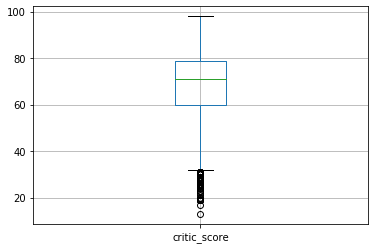

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [14]:
data.boxplot(column='critic_score')
plt.show()
data['critic_score'].describe()

Здесь выбросов нет, просто есть игры с определенным низким рейтингом. Я бы заменила пропуски в рейтингах критиков и пользователей на медиану, а не на среднее. Но также я бы группировала по платформам, так как на разных платформах разные рейтинги. Для двух столбцов critic_score и user_score с помощью функции для одной строки произведем замену пропусков

**Оценка критиков и пользователей**

In [15]:
print(data['critic_score'].isna().sum())
print(data['user_score'].isna().sum())

8576
6699


Производить замену пропусков не будем, так как некоторые игры не оцениваются, некоторые перевыпускаются и так далее, тоже самое и с оценкой пользователей.

In [16]:
# переведем числовые значения, выраженные типом str, в float
data.loc[
    (~data['user_score'].isna()) & (data['user_score']!='tbd'), 'user_score'
] = data.loc[
    (~data['user_score'].isna()) & (data['user_score']!='tbd'), 'user_score'
].astype('float')

print(data['user_score'].unique())

[8.0 nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.0 7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.0 7.3 4.3 7.6 5.7 5.0 9.1 6.5 'tbd'
 8.8 6.9 9.4 6.8 6.1 6.7 5.4 4.0 4.9 4.5 9.3 6.2 4.2 6.0 3.7 4.1 5.8 5.6
 5.5 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.0 2.7 2.2 2.0
 9.5 2.1 3.6 2.8 1.8 3.8 0.0 1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5
 1.3 0.2 0.6 1.4 0.9 1.0 9.7]


**Рейтинг**

In [17]:
# осталось избавиться от пропусков в столбце rating
# print(data['rating'].unique())
# print(data[data['rating'].isna()]['name'].count())

In [18]:
# на мой вгляд, если не указан рейтинг игры, значит она подходит для всех
# но сначала изучим, какие года, платформы и жанры чаще встречаются для "пропускных" рейтингов
# print('Уникальные значения годов выпуска', sorted(data[data['rating'].isna()]['year_of_release'].unique()))
# print('Года по всей таблице', sorted(data['year_of_release'].unique()))
# print()
# print('Уникальные значения жанров', sorted(data[data['rating'].isna()]['genre'].unique()))
# print('Жанры по всей таблице', sorted(data['genre'].unique()))
# print()
# print('Уникальные значения платформ', sorted(data[data['rating'].isna()]['platform'].unique()))
# print('Платформы по всей таблице', sorted(data['platform'].unique()))
# print()

In [19]:
# так как взаимосвязи никакой нет, пропуски есть в практически каждом году, в каждой платформе и каждом жанре, 
# поэтому заменяем пропуски в рейтинге на Е и К-А, но по разным годам:

# ВИКИ: «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. 
# Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, 
# в основном «мультяшного» характера. 
# Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. 
# Первоначально "K-A" ("Kids to Adults"). --> то есть с 1996 года стал присваиваться рейтинг 'E'

# игры до 1996 года (по 1995 включительно) рейтинг К-А
# игра с 1996 года - рейтинг Е
# data.loc[(data['rating'].isna())&(data['year_of_release']<1996), 'rating'] = 'K-A'
# data.loc[(data['rating'].isna())&(data['year_of_release']>=1996), 'rating'] = 'E'
# print(data[data['rating'].isna()]['rating'].count())

После полной предобработки данных получаем последний столбец, где просчитаны общие продажи по всем четырем регионам

In [20]:
data['sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


**Вывод**

Какая была произведена предобработка данных:
- удалены строки с пропусками в названиях игр
- пропуски в годах заменены с помощью датафрейма, посчитанного вручную (была найдена в гугле игра и ее год выпуска)
- пропусков в na_sales, eu_sales, jp_sales и other_sales не было 
- пропуски в critic_score были заменены на медианы, сгруппированные по платформам
- пропуски в user_score были заменены так: так как данные в этом столбце заданы строковым типом данных, выделили срез данных с числами и перевели их в тип float, затем особую пользовательскую оценку так же заменили на пропуск, и после того как в столбце остались только вещественные значения и пропуски, заменили пропуски на медиану, сгруппированную по платформе
- пропуски в столбце рейтинг были заменены Е, если игра была выпущена до 1996 года, и на K-A, если игра была выпущена в 1996 году и позже

Дополнительно добавили столбец с глобальными продажами по всему миру, посчитанный суммой четырех столбцов по регионам

## 3. Исследовательский анализ данных

*посмотрим, сколько игр выпускалось и какие были продажи в **разные годы**, сделаем это с помощью сводной таблицы*

In [21]:
games_per_year = data.groupby('year_of_release').agg({'name':['count'], 'sales':['sum']})
games_per_year.columns = ['_'.join(col) for col in games_per_year.columns]
games_per_year = games_per_year.reset_index()
games_per_year = games_per_year.rename(columns={'name_count': 'count_games', 'sales_sum': 'sales'})
display(games_per_year)

,year_of_release,count_games,sales
0,1977,3,2.50
1,1978,4,1.00
2,1979,2,1.61
3,1980,14,15.65
4,1981,47,36.12
5,1982,37,29.35
6,1983,17,16.80
7,1984,15,50.38
8,1985,14,53.95
9,1986,21,37.08


In [22]:
display(games_per_year.sort_values(by='count_games', ascending=False))

,year_of_release,count_games,sales
31,2008,1455,683.52
32,2009,1444,660.51
33,2010,1276,595.96
30,2007,1214,614.14
34,2011,1180,520.63
29,2006,1026,523.92
28,2005,956,464.71
25,2002,850,402.70
26,2003,788,368.00
27,2004,773,421.51


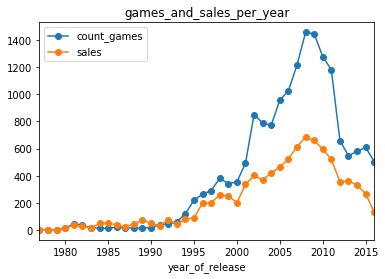

In [23]:
# построим график глобальных продаж и количества игр по годам
games_per_year.plot(x='year_of_release', y=['count_games','sales'], style='o-', title='games_and_sales_per_year')
plt.show()

Суммарные продажи прямопропорциональны количеству выпущенных игр в определенный год. С 1995 года начинается активный рост вплоть до 2008 года, в который были достигнуты пиковые значения и по количеству игр, и по продажам.


Так как зависимость прямая, то для планирования бюджета на 2017 год актуальным периодом будет все предыдущие года.

*посмотрим, как менялись* **продажи** *по* **платформам**, *определим, за какой характерный срок появляются новые и изчезают старые платформы*

In [24]:
platform_per_year = data.groupby('platform').agg({'name':['count'], 'sales':['sum']})
platform_per_year.columns = ['_'.join(col) for col in platform_per_year.columns]
platform_per_year = platform_per_year.reset_index()
platform_per_year = platform_per_year.rename(columns={'name_count': 'count_games', 'sales_sum': 'sales'})
platform_per_year = platform_per_year.sort_values(by='sales', ascending=False)
display(platform_per_year)

,platform,count_games,sales
16,PS2,2161,1255.77
28,X360,1262,971.42
17,PS3,1331,939.65
26,Wii,1320,907.51
4,DS,2151,806.12
15,PS,1197,730.86
6,GBA,822,317.85
18,PS4,392,314.14
19,PSP,1209,294.05
13,PC,974,259.52


In [25]:
platform_per_year = platform_per_year.reset_index()
platform_per_year = platform_per_year.loc[:, 'platform':'sales']
display(platform_per_year)

,platform,count_games,sales
0,PS2,2161,1255.77
1,X360,1262,971.42
2,PS3,1331,939.65
3,Wii,1320,907.51
4,DS,2151,806.12
5,PS,1197,730.86
6,GBA,822,317.85
7,PS4,392,314.14
8,PSP,1209,294.05
9,PC,974,259.52


Выбираем первые шесть платформ с самыми высокими продажами и для этих платформ строим распределения по годам.

In [26]:
platform_per_year_max_sales = platform_per_year[0:6]
display(platform_per_year_max_sales)

,platform,count_games,sales
0,PS2,2161,1255.77
1,X360,1262,971.42
2,PS3,1331,939.65
3,Wii,1320,907.51
4,DS,2151,806.12
5,PS,1197,730.86


In [27]:
platform_max_sales = data[(data['platform']=='PS2') |
                          (data['platform']=='X360') |
                          (data['platform']=='PS3') |
                          (data['platform']=='Wii') |
                          (data['platform']=='DS') |
                          (data['platform']=='PS')].pivot_table(index='year_of_release', columns='platform', values='sales', aggfunc='sum')

platform_max_sales.columns = ['_'.join(col) for col in platform_max_sales.columns]
platform_max_sales = platform_max_sales.reset_index()
platform_max_sales = platform_max_sales.rename(columns={'D_S':'DS',
                                                        'P_S':'PS',
                                                        'P_S_2':'PS2',
                                                        'P_S_3':'PS3',
                                                        'W_i_i':'Wii',
                                                        'X_3_6_0':'X360',})
display(platform_max_sales)

,year_of_release,DS,PS,PS2,PS3,Wii,X360
0,1985,0.02,NaN,NaN,NaN,NaN,NaN
1,1992,NaN,NaN,0.95,NaN,NaN,NaN
2,1994,NaN,6.03,NaN,NaN,NaN,NaN
3,1995,NaN,35.96,0.98,NaN,NaN,NaN
4,1996,NaN,94.70,NaN,NaN,NaN,NaN
5,1997,NaN,136.17,NaN,NaN,NaN,NaN
6,1998,NaN,170.99,NaN,NaN,NaN,NaN
7,1999,NaN,145.67,NaN,NaN,0.04,NaN
8,2000,NaN,96.67,39.17,NaN,NaN,NaN
9,2001,0.10,35.93,167.00,NaN,0.03,NaN


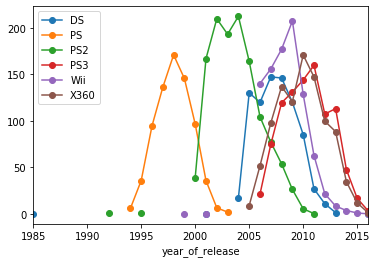

In [28]:
platform_max_sales.plot(x='year_of_release', y = ['DS','PS','PS2','PS3','Wii','X360'], style='o-')
plt.show()

По графику видно, что каждая из 6-ти вышеупомянутых платформ перестает реализовывать игры через 8-10 лет после старта продаж.
А таrже можно следать вывод, что только 3 платформы из них "дожили" до 2016 года. Возможно, есть еще платформы с меньшими продажами, но они стартанули недавно и еще не успели дорасти до высоких продаж. 
Если мы планируем компанию на 2017 год, зачем нам "умершие платформы"?
Попробуем проверить платформы с 2012 по 2016 год (последние 5 лет - это и будет **актуальным периодом**).

In [29]:
data_2012_2016 = data[((data['year_of_release']==2012) |
                      (data['year_of_release']==2013) |
                      (data['year_of_release']==2014) |
                      (data['year_of_release']==2015) |
                      (data['year_of_release']==2016))]

In [30]:
platform_2012_2016 = data_2012_2016.pivot_table(index='year_of_release', columns='platform', values='sales', aggfunc='sum')

platform_2012_2016.columns = ['_'.join(col) for col in platform_2012_2016.columns]
platform_2012_2016 = platform_2012_2016.reset_index()
platform_2012_2016 = platform_2012_2016.rename(columns={'3_D_S':'3DS',
                                                        'D_S':'DS',
                                                        'P_C':'PC',
                                                        'P_S_2':'PS2',
                                                        'P_S_3':'PS3',
                                                        'P_S_4':'PS4',
                                                        'P_S_P':'PSP',
                                                        'P_S_V':'PSV',
                                                        'W_i_i':'Wii',
                                                        'W_i_i_U':'WiiU',
                                                        'X_3_6_0':'X360',
                                                        'X_O_n_e':'XOne',})
display(platform_2012_2016)

,year_of_release,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2012,51.39,11.07,23.23,107.43,NaN,7.69,16.19,21.73,17.56,99.81,NaN
1,2013,56.57,1.54,13.01,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2,2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
3,2015,27.78,NaN,8.53,16.82,118.90,0.12,6.25,1.14,16.35,11.97,60.14
4,2016,15.14,0.04,5.29,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


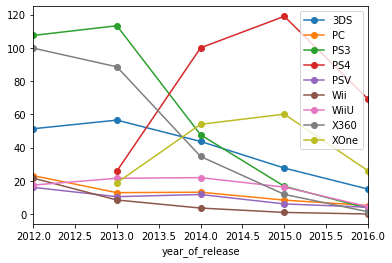

In [31]:
platform_2012_2016.plot(x='year_of_release', y = ['3DS','PC','PS3','PS4','PSV','Wii','WiiU','X360','XOne'], style='o-')
plt.show()

Вот здесь продажи конечно меньше, и абсолютно у всех платформ происходит падение продаж к 2016 году, но так же видно, что остались к 2016 году более менее активные платформы - это PS4, XOne, X360, WiiU, PC, PSV и 3DS. У платформ PSP и DS полностью упали продажи еще до 2016 года.
Я бы назвала **лидирующими** по глобальным продажам **платформы** PS4, XOne, и 3DS. Х360 хочется так же вытащить в лидирующие, но с появлением XOne у нее резкий спад продаж, так что в будущих годах она совсем отвалиться.

Построим **"ящик с усами"** для трех платформ.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


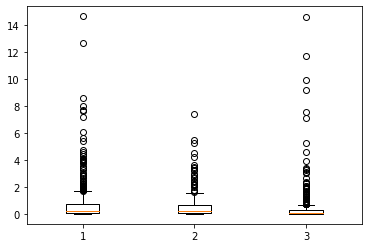

In [32]:
ps4_2012_2016 = data_2012_2016[data_2012_2016['platform']=='PS4']
xone_2012_2016 = data_2012_2016[data_2012_2016['platform']=='XOne']
_3ds_2012_2016 = data_2012_2016[data_2012_2016['platform']=='3DS']

plt.boxplot([ps4_2012_2016['sales'], xone_2012_2016['sales'], _3ds_2012_2016['sales']])
plt.show()

(0, 3)

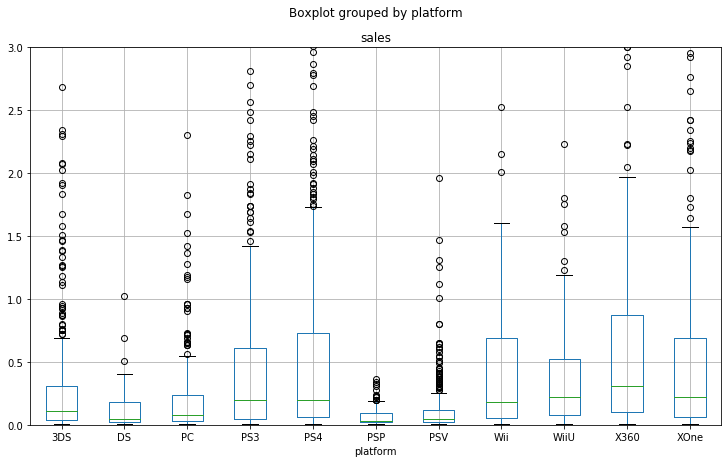

In [33]:
import warnings
warnings.filterwarnings('ignore') # Игнорируем предупреждения.

data_2012_2016.boxplot('sales', by='platform', figsize=(12,7))
plt.ylim(0,3) # Ограничиваем ось.

По трем графикам можно сделать вывод, что самая **популярная платформа - это PS4**, так как у 3DS основная масса продаж находится в границах до 1 млн проданных копий, а у XOne до 1,5 млн и выбросы не привышают 7 млн. У PS4 продажи, с основном, доходят 2 млн, а выбросы и до 14 млн. 

Нижняя черта означает минимум, далее идет первый квартиль - т.е. число, которое больше 25% всей выборки, затем медиана - число, которое лежит ровно по середине значений, далее третий квартиль - число, которое больше 75% всей выборки, и последняя черта - максимум. Остальное выбросы, редкие значения.

Рассмотрим именно эту популярную платформу PS4 для исследования **зависимости отзывов пользователей и критиков на продажи**

In [34]:
display(ps4_2012_2016)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,NaN,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


**critic_score**

In [35]:
pivot_ps4_2012_2016 = ps4_2012_2016.pivot_table(index='critic_score', columns='year_of_release', values='sales', aggfunc='sum')
pivot_ps4_2012_2016 = pivot_ps4_2012_2016.reset_index()

display(pivot_ps4_2012_2016)

year_of_release,critic_score,2013,2014,2015,2016
0,19.0,NaN,NaN,0.12,NaN
1,25.0,NaN,NaN,0.06,NaN
2,31.0,NaN,NaN,NaN,0.02
3,32.0,NaN,NaN,0.20,NaN
4,38.0,0.16,NaN,NaN,NaN
5,42.0,NaN,NaN,0.06,0.01
6,43.0,0.24,NaN,NaN,0.05
7,44.0,NaN,NaN,NaN,0.09
8,45.0,NaN,NaN,NaN,0.14
9,47.0,0.22,0.19,NaN,NaN


In [36]:
# замечаем, что ps4 еще не существовала в 2012 году, следовательно для удобства меняем название переменной
pivot_ps4_2013_2016_critic_score = pivot_ps4_2012_2016

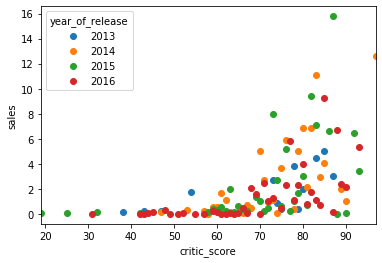

In [37]:
pivot_ps4_2013_2016_critic_score.columns
pivot_ps4_2013_2016_critic_score.plot(x='critic_score', y = [2013, 2014, 2015, 2016], style='o')
plt.ylabel('sales')
plt.show()

2013: 0.6612951140208149
2014: 0.6334137886453651
2015: 0.4520924923861803
2016: 0.595798890588132


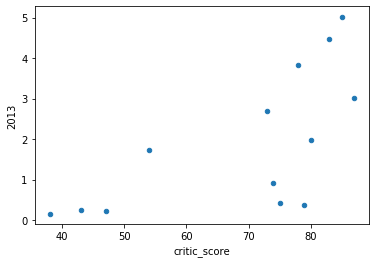

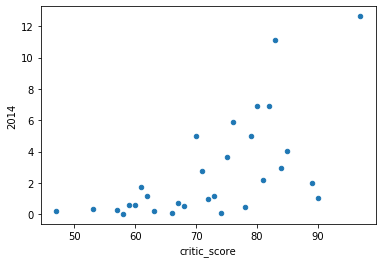

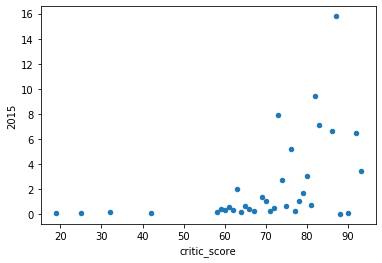

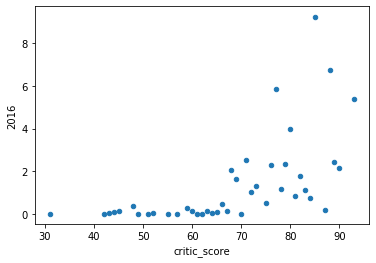

In [38]:
pivot_ps4_2013_2016_critic_score.plot(x='critic_score', y=2013, kind='scatter')
pivot_ps4_2013_2016_critic_score.plot(x='critic_score', y=2014, kind='scatter')
pivot_ps4_2013_2016_critic_score.plot(x='critic_score', y=2015, kind='scatter')
pivot_ps4_2013_2016_critic_score.plot(x='critic_score', y=2016, kind='scatter')
print('2013:', pivot_ps4_2013_2016_critic_score['critic_score'].corr(pivot_ps4_2013_2016_critic_score[2013]))
print('2014:', pivot_ps4_2013_2016_critic_score['critic_score'].corr(pivot_ps4_2013_2016_critic_score[2014]))
print('2015:', pivot_ps4_2013_2016_critic_score['critic_score'].corr(pivot_ps4_2013_2016_critic_score[2015]))
print('2016:', pivot_ps4_2013_2016_critic_score['critic_score'].corr(pivot_ps4_2013_2016_critic_score[2016]))

Уровни зависимости продаж от *оценки критиков* по четырем годам различаются, но 2013, 2014 и 2016 года показывают слабую зависимость. Во всех представленных годах при оценке критиков выше 65 баллов продажи выше.

**user_score**

In [39]:
pivot_ps4_2013_2016_user_score = ps4_2012_2016.pivot_table(index='user_score', columns='year_of_release', values='sales', aggfunc='sum')
pivot_ps4_2013_2016_user_score = pivot_ps4_2013_2016_user_score.reset_index()

display(pivot_ps4_2013_2016_user_score)

year_of_release,user_score,2013,2014,2015,2016
0,1.5,NaN,NaN,0.20,NaN
1,1.9,NaN,NaN,0.06,NaN
2,2,0.22,NaN,NaN,0.01
3,2.3,NaN,NaN,NaN,0.01
4,2.7,0.24,NaN,NaN,NaN
5,2.9,0.16,NaN,NaN,NaN
6,3,NaN,NaN,0.06,NaN
7,3.3,NaN,NaN,0.30,NaN
8,3.4,NaN,NaN,0.12,5.37
9,3.5,NaN,NaN,NaN,0.05


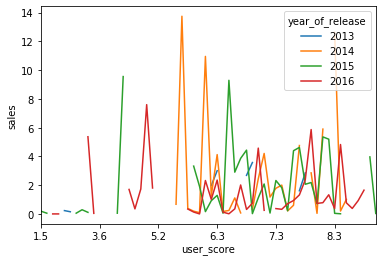

In [40]:
pivot_ps4_2013_2016_user_score.columns
pivot_ps4_2013_2016_user_score.plot(x='user_score', y = [2013, 2014, 2015, 2016], style='-')
plt.ylabel('sales')
plt.show()

2013: 0.06665337937310097
2014: 0.22603475891668423
2015: 0.31516361307554924
2016: 0.20370271545213206


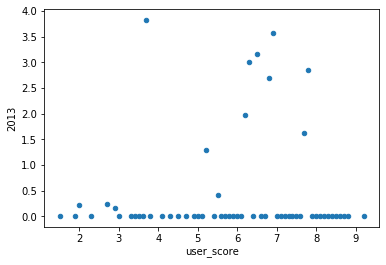

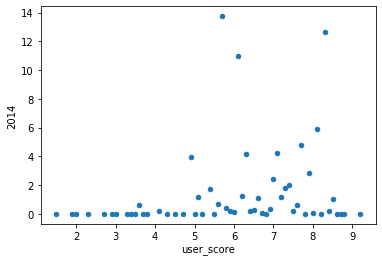

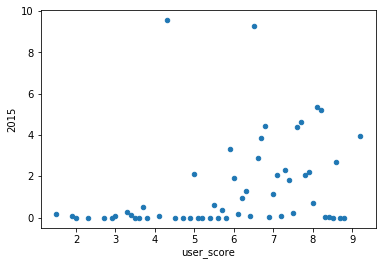

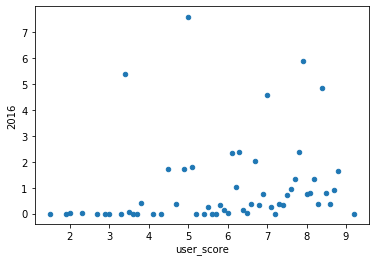

In [41]:
pivot_ps4_2013_2016_user_score = pivot_ps4_2013_2016_user_score[pivot_ps4_2013_2016_user_score['user_score']!='tbd']
# display(pivot_ps4_2013_2016_user_score)

pivot_ps4_2013_2016_user_score = pivot_ps4_2013_2016_user_score.fillna(0)


pivot_ps4_2013_2016_user_score.plot(x='user_score', y=2013, kind='scatter')
pivot_ps4_2013_2016_user_score.plot(x='user_score', y=2014, kind='scatter')
pivot_ps4_2013_2016_user_score.plot(x='user_score', y=2015, kind='scatter')
pivot_ps4_2013_2016_user_score.plot(x='user_score', y=2016, kind='scatter')
print('2013:', pivot_ps4_2013_2016_user_score['user_score'].corr(pivot_ps4_2013_2016_user_score[2013]))
print('2014:', pivot_ps4_2013_2016_user_score['user_score'].corr(pivot_ps4_2013_2016_user_score[2014]))
print('2015:', pivot_ps4_2013_2016_user_score['user_score'].corr(pivot_ps4_2013_2016_user_score[2015]))
print('2016:', pivot_ps4_2013_2016_user_score['user_score'].corr(pivot_ps4_2013_2016_user_score[2016]))

Уровни зависимости продаж от *оценки пользователей* по четырем годам в целом очень низкие, кроме 2013 года, там уровень слабый. 
И уж если на самой популярной платформе крайне слабо зависят продажи от оценок критиков и пользователей, то и такой же **вывод** можно сделать и **для других платформ**

Проверим игры по **жанрам** на этих платформах, какие из них самые востребованные, у каких самые высокие и самые низкие продажи 

In [42]:
genre_max_sales = data_2012_2016.pivot_table(index='year_of_release', columns='genre', values='sales', aggfunc='sum')

genre_max_sales.columns = ['_'.join(col) for col in genre_max_sales.columns]
genre_max_sales = genre_max_sales.reset_index()
genre_max_sales = genre_max_sales.rename(columns={'A_c_t_i_o_n':'Action',
                                                  'A_d_v_e_n_t_u_r_e':'Adventure',
                                                  'F_i_g_h_t_i_n_g':'Fighting',
                                                  'M_i_s_c':'Misc',
                                                  'P_l_a_t_f_o_r_m':'Platform',
                                                  'P_u_z_z_l_e':'Puzzle',
                                                  'R_a_c_i_n_g':'Racing',
                                                  'R_o_l_e_-_P_l_a_y_i_n_g':'Role-Playing',
                                                  'S_h_o_o_t_e_r':'Shooter',
                                                  'S_i_m_u_l_a_t_i_o_n':'Simulation',
                                                  'S_p_o_r_t_s':'Sports',
                                                  'S_t_r_a_t_e_g_y':'Strategy',
                                                 })
display(genre_max_sales)

,year_of_release,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,2012,119.25,5.79,9.18,22.22,18.37,1.78,13.61,46.94,71.76,13.52,30.42,3.26
1,2013,123.14,6.09,7.09,25.27,24.54,0.96,12.37,44.45,62.04,8.63,41.17,6.12
2,2014,97.23,5.57,15.85,23.38,8.81,1.49,16.66,45.62,65.21,5.58,45.15,0.98
3,2015,72.02,8.16,7.90,11.57,6.05,0.71,8.07,37.64,67.52,5.66,40.84,1.86
4,2016,30.15,3.82,4.47,2.60,3.23,0.01,2.79,18.18,38.22,1.89,23.49,1.17


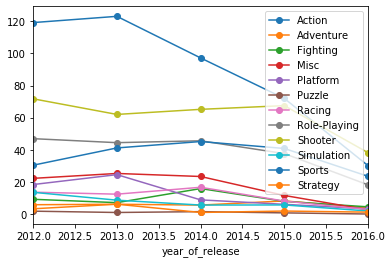

In [43]:
genre_max_sales.plot(x='year_of_release', y = ['Action',
                                               'Adventure',
                                               'Fighting',
                                               'Misc',
                                               'Platform',
                                               'Puzzle',
                                               'Racing',
                                               'Role-Playing',
                                               'Shooter',
                                               'Simulation',
                                               'Sports',
                                               'Strategy'], style='o-')
plt.show()


- Выделяется 4 жанра игр с самым высоким уровнем продаж - это Action, Shooter, Role-Playing и Sports.
- Менее востребованные и слабо продающиееся - это Misc, Platform, Racing, Fighting
- Самые низкие продажи у следующих жанров: Simulation, Adventure, Strategy и Puzzle

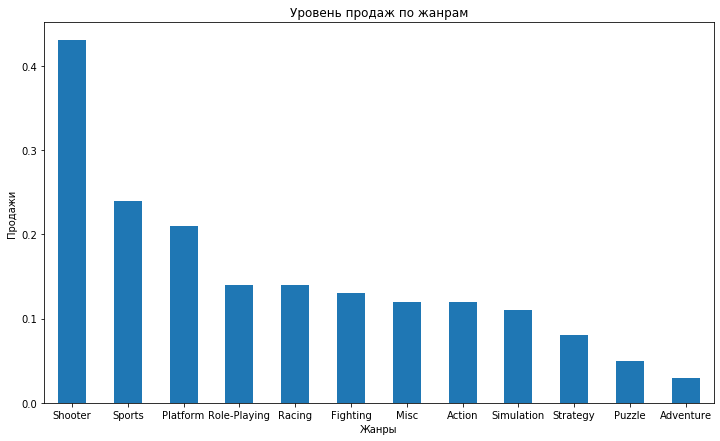

In [44]:
data_2012_2016.groupby('genre')['sales'].median().sort_values()[::-1].plot.bar(figsize=(12,7))

plt.xticks(rotation=0)

plt.title('Уровень продаж по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()

## 4. Составление портрета пользователя каждого региона

Составим новую сводную таблицу по популярности **платформ**, выделим топ-5 для каждого региона

In [45]:
pivot_region_platform = data_2012_2016.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sales'], aggfunc='sum')
pivot_region_platform = pivot_region_platform.reset_index()
pivot_region_platform = pivot_region_platform.sort_values(by='sales', ascending=False)
pivot_region_platform = pivot_region_platform.reset_index()
pivot_region_platform = pivot_region_platform.loc[:, 'platform':'sales']
display(pivot_region_platform)

,platform,eu_sales,jp_sales,na_sales,other_sales,sales
0,PS4,141.09,15.96,108.74,48.35,314.14
1,PS3,106.86,35.29,103.44,43.27,288.86
2,X360,74.52,1.57,140.12,20.41,236.62
3,3DS,42.64,87.82,55.31,8.87,194.64
4,XOne,51.59,0.34,93.12,14.27,159.32
5,WiiU,25.13,13.01,38.10,5.95,82.19
6,PC,38.29,0.00,19.21,5.84,63.34
7,PSV,11.36,21.04,10.98,5.80,49.18
8,Wii,11.92,3.39,17.47,2.61,35.39
9,DS,3.58,3.76,4.59,0.72,12.65


Топ 5 самых популярных платформ в мире - это PS4, PS3, X360, 3DS, XOne
- Для Северной Америки, Европы и других стран большую популярность приобрели те же платформы
- Для Японии это PS4, 3DS, PS3, WiiU и PSV

Рассмотрим каждый регион в отдельности и добавим доли от продаж по всему миру

*Северная Америка*

In [46]:
# создаем табличку для региона Северной Америки
na_platform = pivot_region_platform.loc[:, ['platform','na_sales', 'sales']]
# добавляем в нее столбец с долями от продаж по всему миру, производя деление продаж в Америке на продажи во всем мире
na_platform['ratio'] = na_platform['na_sales'] / na_platform['sales']
# сортируем по продажам в Америке
na_platform = na_platform.sort_values(by='na_sales', ascending=False)
na_platform = na_platform.reset_index()
na_platform = na_platform.loc[:, 'platform':'ratio']
# и выводи топ-5 платформ для Северной Америки
display(na_platform.head())

,platform,na_sales,sales,ratio
0,X360,140.12,236.62,0.592173
1,PS4,108.74,314.14,0.346151
2,PS3,103.44,288.86,0.358097
3,XOne,93.12,159.32,0.584484
4,3DS,55.31,194.64,0.284166


*Европа*

In [47]:
# создаем табличку для региона Северной Америки
eu_platform = pivot_region_platform.loc[:, ['platform','eu_sales', 'sales']]
# добавляем в нее столбец с долями от продаж по всему миру, производя деление продаж в Европе на продажи во всем мире
eu_platform['ratio'] = eu_platform['eu_sales'] / eu_platform['sales']
# сортируем по продажам в Европе
eu_platform = eu_platform.sort_values(by='eu_sales', ascending=False)
eu_platform = eu_platform.reset_index()
eu_platform = eu_platform.loc[:, 'platform':'ratio']
# и выводи топ-5 платформ для Европы
display(eu_platform.head())

,platform,eu_sales,sales,ratio
0,PS4,141.09,314.14,0.449131
1,PS3,106.86,288.86,0.369937
2,X360,74.52,236.62,0.314935
3,XOne,51.59,159.32,0.323814
4,3DS,42.64,194.64,0.219071


*Япония*

In [48]:
# создаем табличку для региона Северной Америки
jp_platform = pivot_region_platform.loc[:, ['platform','jp_sales', 'sales']]
# добавляем в нее столбец с долями от продаж по всему миру, производя деление продаж в Японии на продажи во всем мире
jp_platform['ratio'] = jp_platform['jp_sales'] / jp_platform['sales']
# сортируем по продажам в Японии
jp_platform = jp_platform.sort_values(by='jp_sales', ascending=False)
jp_platform = jp_platform.reset_index()
jp_platform = jp_platform.loc[:, 'platform':'ratio']
# и выводи топ-5 платформ для Японии
display(jp_platform.head())

,platform,jp_sales,sales,ratio
0,3DS,87.82,194.64,0.451192
1,PS3,35.29,288.86,0.122170
2,PSV,21.04,49.18,0.427816
3,PS4,15.96,314.14,0.050805
4,WiiU,13.01,82.19,0.158292


*Другие страны*

In [49]:
# создаем табличку для региона Северной Америки
other_platform = pivot_region_platform.loc[:, ['platform','other_sales', 'sales']]
# добавляем в нее столбец с долями от продаж по всему миру, производя деление продаж в других странах на продажи во всем мире
other_platform['ratio'] = other_platform['other_sales'] / other_platform['sales']
# сортируем по продажам в других странах
other_platform = other_platform.sort_values(by='other_sales', ascending=False)
other_platform = other_platform.reset_index()
other_platform = other_platform.loc[:, 'platform':'ratio']
# и выводи топ-5 платформ для других стран
display(other_platform.head())

,platform,other_sales,sales,ratio
0,PS4,48.35,314.14,0.153912
1,PS3,43.27,288.86,0.149796
2,X360,20.41,236.62,0.086256
3,XOne,14.27,159.32,0.089568
4,3DS,8.87,194.64,0.045571


Составим новую сводную таблицу по популярности **жанров**, выделим топ-5 для каждого региона

In [50]:
pivot_region_genre = data_2012_2016.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sales'], aggfunc='sum')
pivot_region_genre = pivot_region_genre.reset_index()
pivot_region_genre = pivot_region_genre.sort_values(by='sales', ascending=False)
pivot_region_genre = pivot_region_genre.reset_index()
pivot_region_genre = pivot_region_genre.loc[:, 'genre':'sales']
display(pivot_region_genre)

,genre,eu_sales,jp_sales,na_sales,other_sales,sales
0,Action,159.82,52.84,177.92,51.21,441.79
1,Shooter,113.47,9.23,144.79,37.26,304.75
2,Role-Playing,48.53,65.47,64.00,14.83,192.83
3,Sports,69.09,8.01,81.53,22.44,181.07
4,Misc,26.32,12.86,38.19,7.67,85.04
5,Platform,21.41,8.63,25.38,5.58,61.00
6,Racing,27.29,2.50,17.22,6.49,53.50
7,Fighting,10.79,9.44,19.79,4.47,44.49
8,Simulation,14.55,10.41,8.11,2.21,35.28
9,Adventure,9.46,8.24,8.92,2.81,29.43


Топ 5 самых популярных  жанров в мире - это Shooter, Action, Sports, Role-Playing, Misc
- Для Северной Америки, Европы и других стран большую популярность приобрели Shooter, Action, Sports и Role-Playing
- Для Японии это Action, Role-Playing, Shooter, Simulation, Misc

Рассмотрим каждый регион в отдельности и добавим доли от продаж по всему миру

*Северная Америка*

In [51]:
# создаем табличку для региона Северной Америки
na_genre = pivot_region_genre.loc[:, ['genre','na_sales', 'sales']]
# добавляем в нее столбец с долями от продаж по всему миру, производя деление продаж в Америке на продажи во всем мире
na_genre['ratio'] = na_genre['na_sales'] / na_genre['sales']
# сортируем по продажам в Америке
na_genre = na_genre.sort_values(by='na_sales', ascending=False)
na_genre = na_genre.reset_index()
na_genre = na_genre.loc[:, 'genre':'ratio']
# и выводи топ-5 платформ для Северной Америки
display(na_genre.head())

,genre,na_sales,sales,ratio
0,Action,177.92,441.79,0.402725
1,Shooter,144.79,304.75,0.475111
2,Sports,81.53,181.07,0.450268
3,Role-Playing,64.00,192.83,0.331899
4,Misc,38.19,85.04,0.449083


*Европа*

In [52]:
# создаем табличку для региона Европы
eu_genre = pivot_region_genre.loc[:, ['genre','eu_sales', 'sales']]
# добавляем в нее столбец с долями от продаж по всему миру, производя деление продаж в Европе на продажи во всем мире
eu_genre['ratio'] = eu_genre['eu_sales'] / eu_genre['sales']
# сортируем по продажам в Европе
eu_genre = eu_genre.sort_values(by='eu_sales', ascending=False)
eu_genre = eu_genre.reset_index()
eu_genre = eu_genre.loc[:, 'genre':'ratio']
# и выводи топ-5 платформ для Европы
display(eu_genre.head())

,genre,eu_sales,sales,ratio
0,Action,159.82,441.79,0.361756
1,Shooter,113.47,304.75,0.372338
2,Sports,69.09,181.07,0.381565
3,Role-Playing,48.53,192.83,0.251672
4,Racing,27.29,53.50,0.510093


*Япония*

In [53]:
# создаем табличку для региона Японии
jp_genre = pivot_region_genre.loc[:, ['genre','jp_sales', 'sales']]
# добавляем в нее столбец с долями от продаж по всему миру, производя деление продаж в Японии на продажи во всем мире
jp_genre['ratio'] = jp_genre['jp_sales'] / jp_genre['sales']
# сортируем по продажам в Японии
jp_genre = jp_genre.sort_values(by='jp_sales', ascending=False)
jp_genre = jp_genre.reset_index()
jp_genre = jp_genre.loc[:, 'genre':'ratio']
# и выводи топ-5 платформ для Японии
display(jp_genre.head())

,genre,jp_sales,sales,ratio
0,Role-Playing,65.47,192.83,0.339522
1,Action,52.84,441.79,0.119604
2,Misc,12.86,85.04,0.151223
3,Simulation,10.41,35.28,0.295068
4,Fighting,9.44,44.49,0.212183


*Другие страны*

In [54]:
# создаем табличку для других стран
other_genre = pivot_region_genre.loc[:, ['genre','other_sales', 'sales']]
# добавляем в нее столбец с долями от продаж по всему миру, производя деление продаж в других странах на продажи во всем мире
other_genre['ratio'] = other_genre['other_sales'] / other_genre['sales']
# сортируем по продажам в других странах
other_genre = other_genre.sort_values(by='other_sales', ascending=False)
other_genre = other_genre.reset_index()
other_genre = other_genre.loc[:, 'genre':'ratio']
# и выводи топ-5 платформ для других стран
display(other_genre.head())

,genre,other_sales,sales,ratio
0,Action,51.21,441.79,0.115915
1,Shooter,37.26,304.75,0.122264
2,Sports,22.44,181.07,0.123930
3,Role-Playing,14.83,192.83,0.076907
4,Misc,7.67,85.04,0.090193


Составим новую сводную таблицу по **рейтингу ESRB**, выделим топ-5 для каждого региона, но прежде заменим пропуски в рейтингах на E для игр с 1996, так как у нас актуальный период 2102-2016 года

In [55]:
data_2012_2016.loc[data_2012_2016['rating'].isna(), 'rating'] = 'нет рейтинга'
print(data[data['rating'].isna()]['rating'].count())

0


In [56]:
pivot_region_rating = data_2012_2016.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sales'], aggfunc='sum')
pivot_region_rating = pivot_region_rating.reset_index()
pivot_region_rating = pivot_region_rating.sort_values(by='sales', ascending=False)
pivot_region_rating = pivot_region_rating.reset_index()
pivot_region_rating = pivot_region_rating.loc[:, 'rating':'sales']
display(pivot_region_rating)

,rating,eu_sales,jp_sales,na_sales,other_sales,sales
0,M,194.44,21.20,231.67,63.45,510.76
1,нет рейтинга,91.50,108.91,103.33,27.17,330.91
2,E,113.03,28.33,114.37,31.44,287.17
3,T,52.96,26.02,66.14,17.96,163.08
4,E10+,55.43,8.19,75.70,16.24,155.56
5,RP,0.04,0.00,0.00,0.00,0.04


Топ 4 самых популярных  рейтингов в мире - это М, нет рейтинга, E, T, E10+

Рассмотрим каждый регион в отдельности и добавим доли от продаж по всему миру

RP вылетает отовсюду

*Северная Америка*

In [65]:
# создаем табличку для региона Северной Америки
na_rating = pivot_region_rating.loc[:, ['rating','na_sales', 'sales']]
# добавляем в нее столбец с долями от продаж по всему миру, производя деление продаж в Америке на продажи во всем мире
na_rating['ratio'] = na_rating['na_sales'] / na_rating['sales']
# сортируем по продажам в Америке
na_rating = na_rating.sort_values(by='na_sales', ascending=False)
na_rating = na_rating.reset_index()
na_rating = na_rating.loc[:3, 'rating':'ratio']
# и выводи топ-5 платформ для Северной Америки
display(na_rating)

,rating,na_sales,sales,ratio
0,M,231.67,510.76,0.453579
1,E,114.37,287.17,0.398266
2,нет рейтинга,103.33,330.91,0.312260
3,E10+,75.70,155.56,0.486629


*Европа*

In [58]:
# создаем табличку для региона Европы
eu_rating = pivot_region_rating.loc[:, ['rating','eu_sales', 'sales']]
# добавляем в нее столбец с долями от продаж по всему миру, производя деление продаж в Европе на продажи во всем мире
eu_rating['ratio'] = eu_rating['eu_sales'] / eu_rating['sales']
# сортируем по продажам в Европе
eu_rating = eu_rating.sort_values(by='eu_sales', ascending=False)
eu_rating = eu_rating.reset_index()
eu_rating = eu_rating.loc[:3, 'rating':'ratio']
# и выводи топ-5 платформ для Европы
display(eu_rating)

,rating,eu_sales,sales,ratio
0,M,194.44,510.76,0.380688
1,E,113.03,287.17,0.393600
2,нет рейтинга,91.50,330.91,0.276510
3,E10+,55.43,155.56,0.356326


*Япония*

In [59]:
# создаем табличку для региона Японии
jp_rating = pivot_region_rating.loc[:, ['rating','jp_sales', 'sales']]
# добавляем в нее столбец с долями от продаж по всему миру, производя деление продаж в Японии на продажи во всем мире
jp_rating['ratio'] = jp_rating['jp_sales'] / jp_rating['sales']
# сортируем по продажам в Японии
jp_rating = jp_rating.sort_values(by='jp_sales', ascending=False)
jp_rating = jp_rating.reset_index()
jp_rating = jp_rating.loc[:3, 'rating':'ratio']
# и выводи топ-5 платформ для Японии
display(jp_rating)

,rating,jp_sales,sales,ratio
0,нет рейтинга,108.91,330.91,0.329123
1,E,28.33,287.17,0.098652
2,T,26.02,163.08,0.159554
3,M,21.20,510.76,0.041507


*Другие страны*

In [60]:
# создаем табличку для других стран
other_rating = pivot_region_rating.loc[:, ['rating','other_sales', 'sales']]
# добавляем в нее столбец с долями от продаж по всему миру, производя деление продаж в других странах на продажи во всем мире
other_rating['ratio'] = other_rating['other_sales'] / other_rating['sales']
# сортируем по продажам в других странах
other_rating = other_rating.sort_values(by='other_sales', ascending=False)
other_rating = other_rating.reset_index()
other_rating = other_rating.loc[:3, 'rating':'ratio']
# и выводи топ-5 платформ для других стран
display(other_rating)

,rating,other_sales,sales,ratio
0,M,63.45,510.76,0.124227
1,E,31.44,287.17,0.109482
2,нет рейтинга,27.17,330.91,0.082107
3,T,17.96,163.08,0.110130


В Европе и Японии преобладает рейтинг Е, в Северной Америке и других странах преобладает рейтинг М

М и Т меняются в зависимости от региона (везде, кроме Японии Т уступает М, в Японии наоборот).


**Портрет пользователя каждого региона**

*Северная Америка*
- Предпочитает платформы PS4, PS3 и XOne, X360
- Любимые жанры Action, Shooter, Sports, Role-Playing
- Рейтинг M, E, нет рейтинга, E10+

*Европа*
- Предпочитает платформы PS4 и XOne
- Любимые жанры Shooter, Action, Sports
- Рейтинг M, E, нет рейтинга, E10+

*Япония*
- Предпочитает платформы 3DS, PS4,	PSV
- Любимые жанры Role-Playing, Action, Misc, Simulation
- Рейтинг нет рейтинга, Е, T, M

*Другие страны*
- Предпочитает платформы X360, XOne, PS4,	PSV
- Любимые жанры Action, Role-Playing
- Рейтинг M, Е, нет рейтинга, T

## 5. Формулирование гипотез.

1. Формулируем нулевую и альтернативную гипотезы по **первому пункту**:

Н0 "Средние пользовательские рейтинги платформ XOne и PC одинаковые"

Н1 "Средние пользовательские рейтинги платформ XOne и PC разные"

и проверяем их

In [61]:
data_2012_2016 = data_2012_2016[(data_2012_2016['user_score']!='tbd')&(~data_2012_2016['user_score'].isna())]

list_user_score_xone = []
for i in data_2012_2016[data_2012_2016['platform']=='XOne']['user_score']:
    list_user_score_xone.append(i)

# print(len(list_user_score_xone))
    
list_user_score_pc = []
for i in data_2012_2016[data_2012_2016['platform']=='PC']['user_score']:
    list_user_score_pc.append(i)

# print(len(list_user_score_pc))
    
alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(list_user_score_pc, list_user_score_xone)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.563757590027855
Не получилось отвергнуть нулевую гипотезу



P-value очень высок, следовательно средние пользовательские рейтинги платформ XOne и PC одинаковые.
Проверим через нахождение среднего.

In [62]:
print('Среднее значение пользовательского рейтинга платформы XOne', data_2012_2016[data_2012_2016['platform']=='XOne']['user_score'].mean())
print('Среднее значение пользовательского рейтинга платформы PC', data_2012_2016[data_2012_2016['platform']=='PC']['user_score'].mean())

Среднее значение пользовательского рейтинга платформы XOne 6.52142857142857
Среднее значение пользовательского рейтинга платформы PC 6.431603773584903


Действительно, иx значения очень близки, 6,59 и 6,61. Не отвергаем нулевую гипотезу

2. Формулируем нулевую и альтернативную гипотезы по **второму пункту**:

Н0 "Средние пользовательские рейтинги платформ жанров Action и Sports равны"

Н1 "Средние пользовательские рейтинги платформ жанров Action и Sports разные"

и проверяем их

In [63]:
list_genre_action = []
for i in data_2012_2016[data_2012_2016['genre']=='Action']['user_score']:
    list_genre_action.append(i)

list_genre_sports = []
for i in data_2012_2016[data_2012_2016['genre']=='Sports']['user_score']:
    list_genre_sports.append(i)

    
alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(list_genre_action, list_genre_sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.0953843730469863e-26
Отвергаем нулевую гипотезу


Cредние пользовательские рейтинги жанров Action и Sports равны.
Проверим через нахождение среднего.

In [64]:
print('Среднее значение пользовательского рейтинга жанра Action', data_2012_2016[data_2012_2016['genre']=='Action']['user_score'].mean())
print('Среднее значение пользовательского рейтинга жанра Sports', data_2012_2016[data_2012_2016['genre']=='Sports']['user_score'].mean())

Среднее значение пользовательского рейтинга жанра Action 6.825095057034231
Среднее значение пользовательского рейтинга жанра Sports 5.455897435897437


Действительно, их значения отличаются, 6,83 и 5,45. Отвергаем нулевую гипотезу.

## 6. Общий вывод

Цель проекта: нужно выявить определяющие успешность игры закономерности, это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании

**Полученные данные** 

Имеем датафрейм из ***11 столбцов***:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

В последнем столбце Rating перечислены ***категории*** и вот их расшифровки:

- E - («Everyone») — «Для всех»
- M - («Mature») — «Для взрослых»
- T - («Teen») — «Подросткам»
- E10+ - («Everyone 10 and older») — «Для всех от 10 лет и старше»
- K-A - ("Kids to Adults") - версия E до 1996 (после 1996 года категория изменилась на Е)
- AO - («Adults Only 18+») — «Только для взрослых»
- EC - («Early childhood») — «Для детей младшего возраста»
- RP - («Rating Pending») — «Рейтинг ожидается»

Отсутствие рейтингов также может означать, что игра не оценивалась, так как ее могли перевыпустить. Поэтому заменим пропуски в рейтингах в актуальном периоде на метку "нет рейтинга"

**Предобработка данных**

Какая была произведена предобработка данных:
- удалены строки с пропусками в названиях игр
- пропуски в годах заменены с помощью датафрейма, посчитанного вручную (была найдена в гугле игра и ее год выпуска)
- пропусков в na_sales, eu_sales, jp_sales и other_sales не было 
- пропуски в critic_score были заменены на медианы, сгруппированные по платформам
- пропуски в user_score были заменены так: так как данные в этом столбце заданы строковым типом данных, выделили срез данных с числами и перевели их в тип float, затем особую пользовательскую оценку так же заменили на пропуск, и после того как в столбце остались только вещественные значения и пропуски, заменили пропуски на медиану, сгруппированную по платформе
- пропуски в столбце рейтинг были заменены Е, если игра была выпущена до 1996 года, и на K-A, если игра была выпущена в 1996 году и позже

Дополнительно добавили столбец с глобальными продажами по всему миру, посчитанный суммой четырех столбцов по регионам

**Исследовательский анализ** 

Суммарные *продажи* прямо пропорциональны количеству выпущенных игр в определенный год. С 1995 года начинается активный рост вплоть до 2008 года, в который были достигнуты пиковые значения и по количеству игр, и по продажам. Так как зависимость прямая, то для планирования бюджета на 2017 год актуальным периодом будет все предыдущие года. Так что делаем вывод, что даные за все года не важны.

По графику видно, что каждая из *платформ* перестает реализовывать игры через 8-10 лет после старта продаж.
А также можно следать вывод, что только 3 платформы из них "дожили" до 2016 года. Возможно, есть еще платформы с меньшими продажами, но они стартанули недавно и еще не успели дорасти до высоких продаж: PS2, X360, PS3, Wii, DS, PS.

Таким образом, планируя бюджет на 2017 год, взяли активные в последние 5 лет платформы. *Актуальный период* - 2012-2016 гг.

*Лидирующими* по глобальным продажам *платформы* PS4, XOne, и 3DS. Х360 хочется так же вытащить в лидирующие, но с появлением XOne у нее резкий спад продаж, так что в будущих годах она совсем отвалится.

Был построен по трем лидирующим платформам *ящик с усами*. С помощью них определеили, что самая *популярная платформа - это PS4*, так как у 3DS основная масса продаж находится в границах до 1 млн проданных копий, а у XOne до 1,5 млн и резкие скачки не привышают 7 млн. У PS4 продажи, с основном, доходят 2 млн, а резкие скачки и до 14 млн.

Рассмотрим именно эту популярную платформу PS4 для исследования *зависимости отзывов пользователей и критиков на продажи*

Уровни зависимости продаж от *оценки критиков* по четырем годам различаются, но 2013, 2014 и 2016 года показывают слабую зависимость. Во всех представленных годах при оценке критиков выше 65 баллов продажи выше.
Уровни зависимости продаж от *оценки пользователей* по четырем годам в целом очень низкие, кроме 2013 года, там уровень слабый. 
И уж если на самой популярной платформе крайне слабо зависят продажи от оценок критиков и пользователей, то и такой же вывод можно сделать и *для других платформ*

Проверим игры по *жанрам* на этих платформах, какие из них самые востребованные, у каких самые высокие и самые низкие продажи 
- Выделяется 4 самых прибыльних жанра игр - это Action, Shooter, Role-Playing и Sports.
- Менее востребованные и слабо продающиееся - это Misc, Platform, Racing, Fighting
- Самые низкие продажи у следующих жанров: Simulation, Adventure, Strategy и Puzzle

Топ 5 самых популярных платформ в мире - это PS4, XOne, 3DS, PC, WiiU
- Для Северной Америки и других стран большую популярность приобрели PS4 и XOne (но и остальные вышеперечисленные платформы по всему миру так же представлены в рейтинге топ 5 для Северной Америки)
- Для Японии это PS4, 3DS и PSV
- Для Европы PS4, XOne, 3DS, PC 

**Портрет пользователя каждого региона**

*Северная Америка*
- Предпочитает платформы PS4, PS3 и XOne, X360
- Любимые жанры Action, Shooter, Sports, Role-Playing
- Рейтинг M, E, нет рейтинга, E10+

*Европа*
- Предпочитает платформы PS4 и XOne
- Любимые жанры Shooter, Action, Sports
- Рейтинг M, E, нет рейтинга, E10+

*Япония*
- Предпочитает платформы 3DS, PS4,	PSV
- Любимые жанры Role-Playing, Action, Misc, Simulation
- Рейтинг нет рейтинга, Е, T, M

*Другие страны*
- Предпочитает платформы X360, XOne, PS4,	PSV
- Любимые жанры Action, Role-Playing
- Рейтинг M, Е, нет рейтинга, T

**Формулирование гипотез**

1. Формулируем нулевую и альтернативную гипотезы по *первому пункту*:

Н0 "Средние пользовательские рейтинги платформ XOne и PC одинаковые"

Н1 "Средние пользовательские рейтинги платформ XOne и PC разные"

P-value очень высок, следовательно средние пользовательские рейтинги платформ XOne и PC одинаковые.

Средние значения соответственно 6,59 и 6,61. Не отвергаем нулевую гипотезу

2. Формулируем нулевую и альтернативную гипотезы по *второму пункту*:
Н0 "Средние пользовательские рейтинги платформ жанров Action и Sports равные"

Н1 "Средние пользовательские рейтинги платформ жанров Action и Sports разные"

Средние значения соответственно 6,83 и 5,45. Не отвергаем нулевую гипотезу.